<a href="https://colab.research.google.com/github/AngelRosalesContreras/Practica_3_2/blob/main/Practica_3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

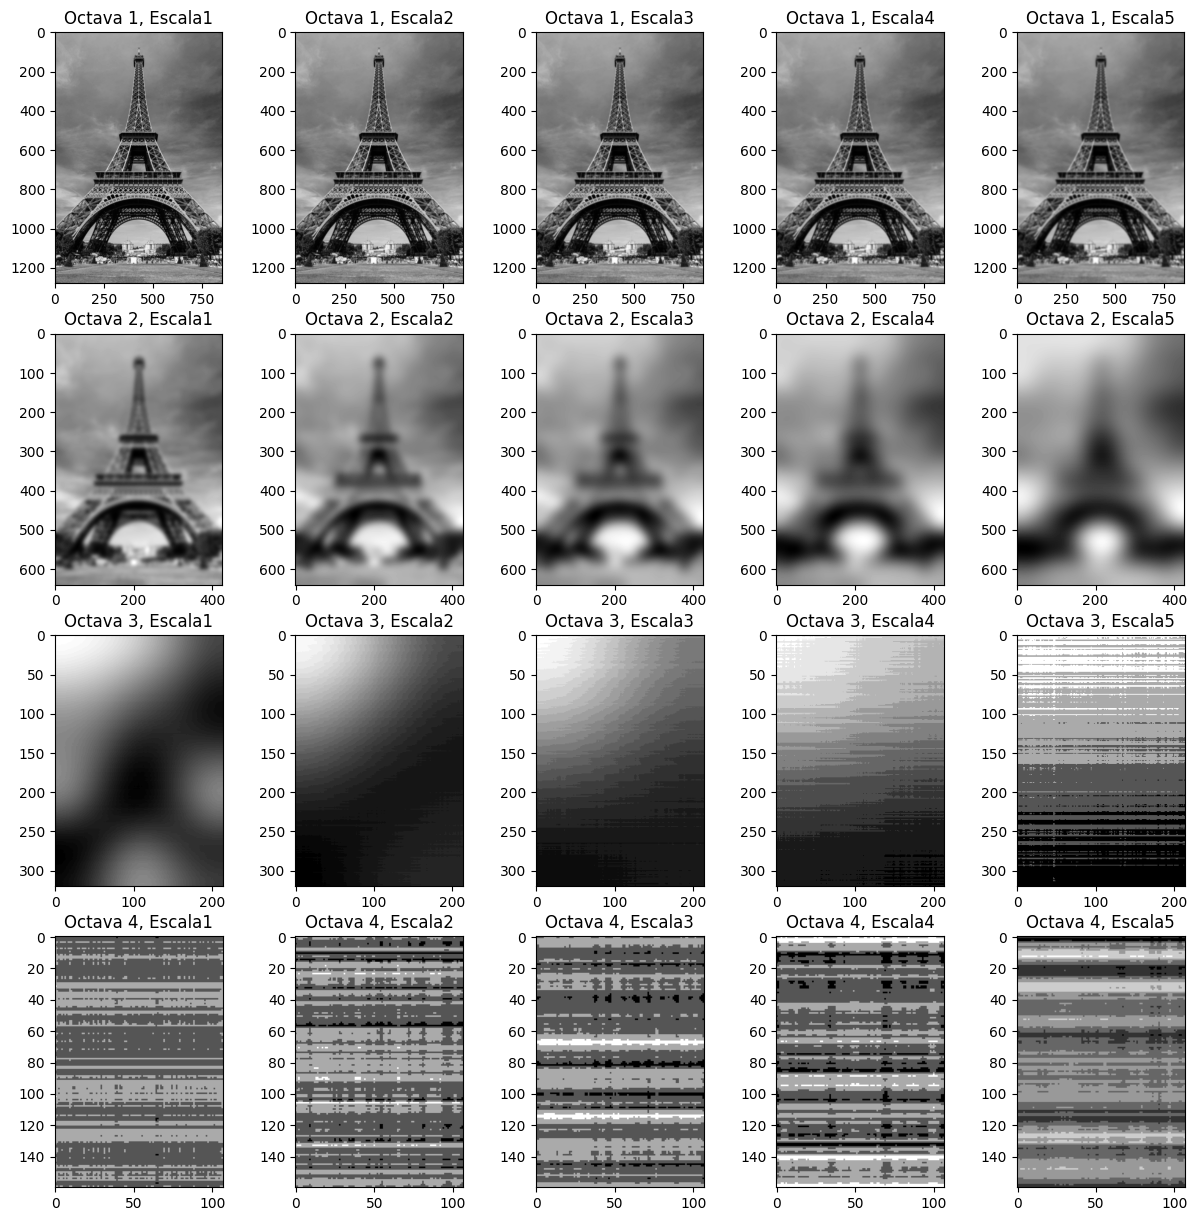

<ipython-input-16-db7a58c92c69>:48: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(len(dog_space), len(images), octave * len(images) + scale + 1)


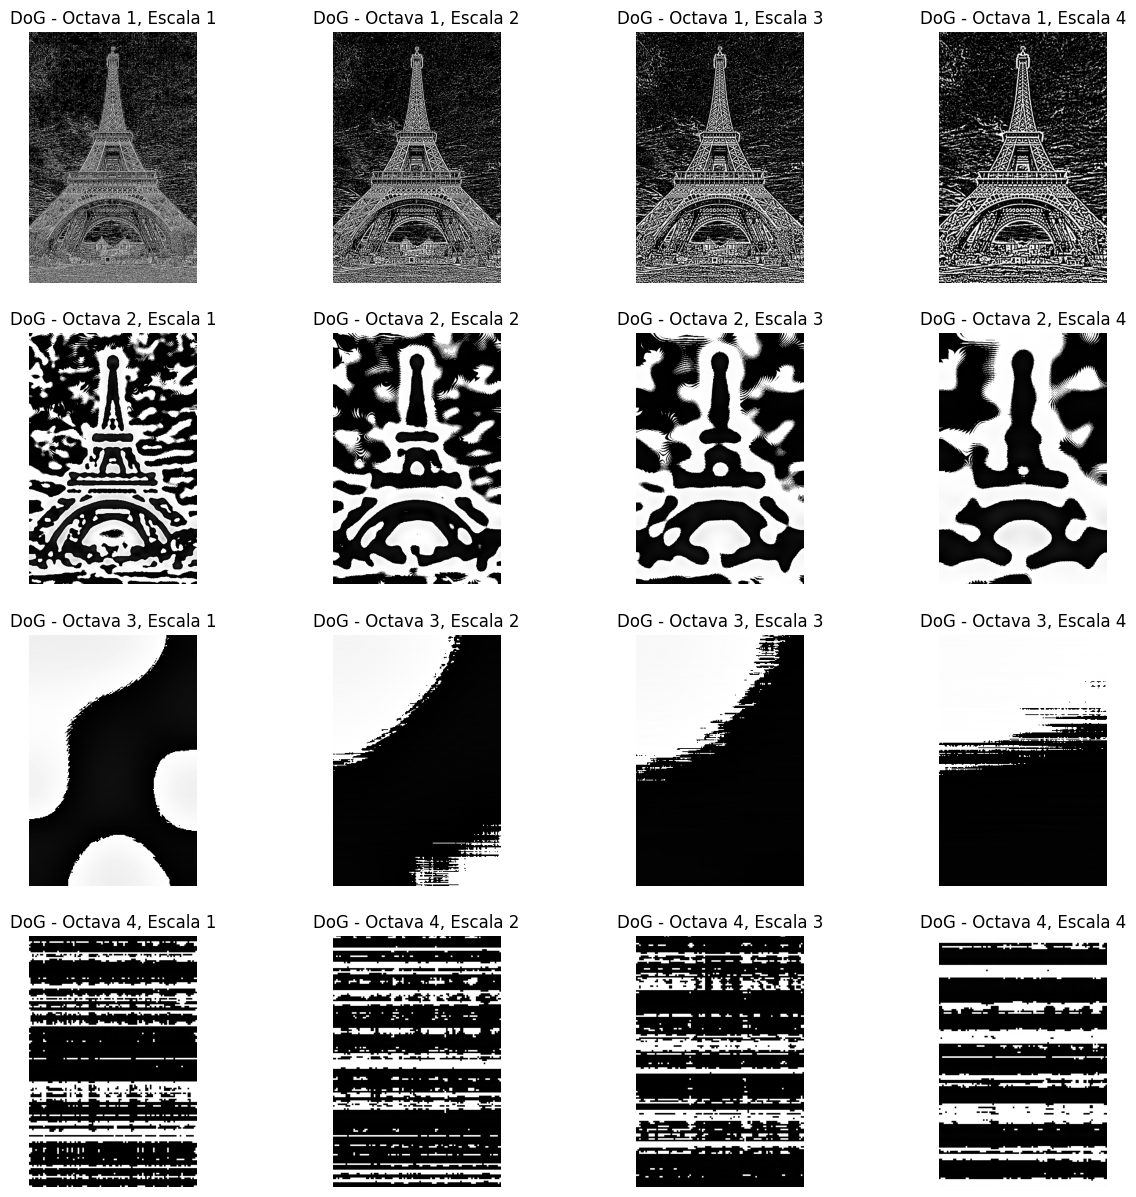

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def build_scale_space(image, num_octaves, num_scales, sigma):
    scale_space = []

    base = image
    for octave in range(num_octaves):
        octave_images = []


        for scale in range(num_scales):
            # Aplica la descomposición de escala
            scaled_image = cv2.GaussianBlur(base, (0, 0), sigmaX=sigma)
            octave_images.append(scaled_image)

            # Actualiza el valor de sigma para la siguiente iteración
            sigma = sigma * 2.0 if scale == 0 else sigma * np.sqrt(2)

        scale_space.append(octave_images)

        # Redimensiona la imagen para la siguiente octava
        base = cv2.pyrDown(base)
        # Redimensiona la imagen para la siguiente octava
        #image_height, image_width = base.shape[:2]
        #base = cv2.resize(base, (image_width // 2, image_height // 2))


    return scale_space


def build_difference_of_gaussians(scale_space):
    dog_space = []

    for octave_images in scale_space:
        dog_octave = [octave_images[i + 1] - octave_images[i] for i in range(len(octave_images) - 1)]
        dog_space.append(dog_octave)

    return dog_space


def visualize_difference_of_gaussians(dog_space):
    fig, axs = plt.subplots(len(scale_space), len(scale_space[0]), figsize=(15, 15))

    for octave, images in enumerate(dog_space):
        for scale, image in enumerate(images):
            plt.subplot(len(dog_space), len(images), octave * len(images) + scale + 1)
            plt.imshow(image, cmap='gray')
            plt.title(f'DoG - Octava {octave + 1}, Escala {scale + 1}')
            plt.axis('off')

    plt.show()

def visualize_difference_of_gaussians(dog_space, scales_used):
    fig, axs = plt.subplots(len(dog_space), len(dog_space[0]), figsize=(15, 15))

    for octave, images in enumerate(dog_space):
        for scale, image in enumerate(images):
            plt.subplot(len(dog_space), len(images), octave * len(images) + scale + 1)
            plt.imshow(image, cmap='gray')

            # Obtener la información sobre las escalas para esta imagen
            scale_info = scales_used[octave * len(images) + scale]

            # Agregar texto con la información sobre las escalas
            plt.text(0.5, 0.95, f'Octava {scale_info[0]}, Escalas {scale_info[1]} - {scale_info[2]}',
                     horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes,
                     color='white', fontsize=8)

            plt.title(f'DoG - Octava {octave + 1}, Escala {scale + 1}')
            plt.axis('off')

    plt.show()


# Cargar una imagen de ejemplo
image_path = 'uno.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Construir el espacio de escalas con parámetros personalizables
scale_space = build_scale_space(image, num_octaves=4, num_scales=5, sigma=0.6)

# Visualizar el espacio de escalas
visualize_scale_space(scale_space)

# Construir el espacio de diferencia de gaussianas (DoG)
dog_space = build_difference_of_gaussians(scale_space)

# Visualizar el espacio de diferencia de gaussianas
visualize_difference_of_gaussians(dog_space)
